## Numpy

In [ ]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [6]:
%%timeit -n40

import random

def create_random_list():
    return [random.random() + 1 for _ in range(10_000)]

create_random_list()

869 µs ± 51.4 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [11]:
%%timeit -n40

import numpy as np

def create_random_list():
    return np.random.random_sample(10_000) + 1

create_random_list()

[1.79590476 1.15192819 1.70867508 ... 1.25946369 1.36476184 1.76022731]
[1.2781597  1.61897444 1.87312273 ... 1.13856842 1.97443218 1.77421689]
[1.31940164 1.87602093 1.07446069 ... 1.45599742 1.44464903 1.73119958]
[1.23014176 1.68117892 1.68970311 ... 1.15311465 1.88913883 1.2154608 ]
[1.61493369 1.6514053  1.61625588 ... 1.25513266 1.50454286 1.47572332]
[1.47798391 1.82927461 1.67551081 ... 1.46367534 1.98593463 1.75306406]
[1.69739278 1.7209986  1.94350254 ... 1.51658834 1.24473132 1.49626304]
[1.43828946 1.61136833 1.85025263 ... 1.87949516 1.15561894 1.0484068 ]
[1.649103   1.60225624 1.84391193 ... 1.59592802 1.55041955 1.70191979]
[1.3397276  1.76451635 1.50186477 ... 1.06444183 1.80449821 1.6649554 ]
[1.57612246 1.00642889 1.52676813 ... 1.13276769 1.00362435 1.42500861]
[1.56908715 1.04815606 1.90325545 ... 1.13940124 1.27088742 1.23038971]
[1.2861791  1.37813185 1.40885329 ... 1.35758475 1.53574393 1.65666797]
[1.83580587 1.3383518  1.26582556 ... 1.14658961 1.86482331 1.21

### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [17]:
%%timeit -n40

import random
from math import sin, cos

def sin_cos_random():
    random_values = [random.random() for _ in range(10_000)]
    return [sin(x) + cos(x) for x in random_values]

586 ns ± 53.1 ns per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [16]:
%%timeit -n40

import numpy as np

def sin_cos_random():
    random_values = np.random.random_sample(10_000)
    return np.sin(random_values) + np.cos(random_values)

110 ns ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 40 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [36]:
%%timeit -n40
import numpy as np

def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def np_cube_sum(x):
    return np.sum(np.power(np.array(x), 3))

def np_almost_variance(x):
    m = np.mean(x)
    return np.sum(np.power(np.array(x) - m, 4)) / len(x)

assert cube_sum([1, 2]) == np_cube_sum([1, 2])
assert almost_variance([1, 2]) == np_almost_variance([1, 2])

73.3 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?


<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [44]:
import numpy as np

def multiplication_table(stop):
    return np.arange(1, stop + 1).reshape((stop, 1)) * np.arange(1, stop + 1)

multiplication_table(10)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [51]:
import numpy as np

points = np.random.random_sample((10, 5))
print(points)

def euclid_dist_for_all_vectors(points):
    vector_dimension = points.shape[1]
    print("Extending dimensions", points[:, None])
    print("xi - yi (with broadcasting", points[:, None] - points)
    print("squaring", np.power(points[:, None] - points, 2))
    print("removing additional dimension before summation", np.power(points[:, None] - points, 2).reshape(-1, vector_dimension))
    return np.sum(
        np.power(points[:, None] - points, 2).reshape(-1, vector_dimension),
        axis=1
    )

euclid_dist_for_all_vectors(points)

[[0.39262166 0.92218231 0.24536538 0.29234883 0.47776323]
 [0.47728452 0.68547385 0.93188089 0.89571247 0.64215031]
 [0.45492595 0.14786952 0.8831506  0.73697813 0.273076  ]
 [0.66349848 0.97613982 0.80406732 0.58494661 0.30002761]
 [0.3462484  0.20436007 0.68984711 0.36185873 0.13509058]
 [0.3963644  0.98444255 0.98186161 0.93274222 0.9217447 ]
 [0.97935405 0.82647579 0.59486635 0.60124069 0.26101524]
 [0.54212631 0.74625715 0.79778624 0.55918829 0.43339688]
 [0.86246724 0.36327228 0.97779838 0.30206559 0.21981484]
 [0.93872922 0.15139548 0.60338975 0.71708481 0.50431997]]
Extending dimensions [[[0.39262166 0.92218231 0.24536538 0.29234883 0.47776323]]

 [[0.47728452 0.68547385 0.93188089 0.89571247 0.64215031]]

 [[0.45492595 0.14786952 0.8831506  0.73697813 0.273076  ]]

 [[0.66349848 0.97613982 0.80406732 0.58494661 0.30002761]]

 [[0.3462484  0.20436007 0.68984711 0.36185873 0.13509058]]

 [[0.3963644  0.98444255 0.98186161 0.93274222 0.9217447 ]]

 [[0.97935405 0.82647579 0.59486

array([0.        , 0.92557305, 1.24980419, 0.50563693, 0.83723944,
       1.15354028, 0.61795944, 0.43164178, 1.13622518, 1.20163317,
       0.92557305, 0.        , 0.4533054 , 0.34912202, 0.84933068,
       0.17797265, 0.61751174, 0.18270697, 0.78507187, 0.6569824 ,
       1.24980419, 0.4533054 , 0.        , 0.75962833, 0.21212277,
       1.17212241, 0.83720922, 0.43027074, 0.41343212, 0.36621369,
       0.50563693, 0.34912202, 0.75962833, 0.        , 0.78631029,
       0.61053429, 0.16771657, 0.08606755, 0.53183344, 0.85542255,
       0.83723944, 0.84933068, 0.21212277, 0.78631029, 0.        ,
       1.64104542, 0.87003284, 0.47159706, 0.38540433, 0.62382956,
       1.15354028, 0.17797265, 1.17212241, 0.61053429, 1.64104542,
       0.        , 1.06105244, 0.48988869, 1.49357942, 1.3521195 ,
       0.61795944, 0.61751174, 0.83720922, 0.16771657, 0.87003284,
       1.06105244, 0.        , 0.27026344, 0.46606018, 0.5300735 ,
       0.43164178, 0.18270697, 0.43027074, 0.08606755, 0.47159

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [62]:
import numpy as np

def whiten_dataset(dataset):
    column_wise_mean = np.mean(dataset, axis=0)
    column_wise_std = np.std(dataset, axis=0)
    return (dataset - column_wise_mean) / column_wise_std

data = np.array(range(10)).reshape((-1, 2))
print(data)
whiten_dataset(data)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn.

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a|
$$

np.

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [54]:
def closest(x, M):
    arr = np.array(M)
    return arr[np.argmin(np.abs(x - arr))]

closest(1.5, [1, -4, 3])
closest(1.5, [100, -100, 2, 3, 1.49, -1.495, 1.495])


0
6


1.495

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`).
Może Ci się przydać metoda `cumprod`.

In [2]:
import numpy as np

def poly(x, a):
    return np.sum(np.cumprod(np.zeros(len(a)) + x) * a)

poly(2, [4, -4, 1])
poly(-2, [4, -4, 1])

-32.0

-32.0

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

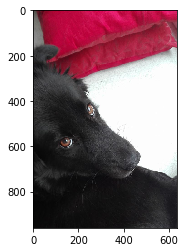

In [9]:
img = mpimg.imread('images/doggo.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

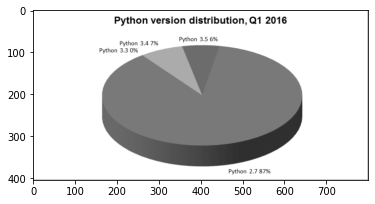

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('images/pie.png')
img = np.sum(img * [0.2126, 0.7152, 0.0722], axis=2)
plt.imshow(img, cmap="gray");

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [82]:
import numpy as np

def interpolate(x1, x2, steps):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return x1 * steps[:, None] + x2 * (1 - steps)[:, None]

interpolate([0, 0, 0], [10, 10, 10], np.linspace(0, 1, 11))

steps [[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[10., 10., 10.],
       [ 9.,  9.,  9.],
       [ 8.,  8.,  8.],
       [ 7.,  7.,  7.],
       [ 6.,  6.,  6.],
       [ 5.,  5.,  5.],
       [ 4.,  4.,  4.],
       [ 3.,  3.,  3.],
       [ 2.,  2.,  2.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.]])